In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

In [2]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train.shape

11490434/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [3]:
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train.shape

TensorShape([60000, 32, 32])

In [4]:
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape

TensorShape([60000, 32, 32, 1])

In [5]:
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [6]:
lenet5_model = models.Sequential()
lenet5_model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
lenet5_model.add(layers.AveragePooling2D(2))
lenet5_model.add(layers.Activation('sigmoid'))
lenet5_model.add(layers.Conv2D(16, 5, activation='tanh'))
lenet5_model.add(layers.AveragePooling2D(2))
lenet5_model.add(layers.Activation('sigmoid'))
lenet5_model.add(layers.Conv2D(120, 5, activation='tanh'))
lenet5_model.add(layers.Flatten())
lenet5_model.add(layers.Dense(84, activation='tanh'))
lenet5_model.add(layers.Dense(10, activation='softmax'))


In [12]:
x_train.shape[1:]

TensorShape([32, 32, 1])

In [7]:
lenet5_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 activation (Activation)     (None, 14, 14, 6)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 activation_1 (Activation)   (None, 5, 5, 16)          0

In [8]:
lenet5_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [9]:
history = lenet5_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 11s 5ms/step - loss: 1.3060 - accuracy: 0.5324 - val_loss: 0.3462 - val_accuracy: 0.8920
Epoch 2/40
907/907 [==============================] - 4s 4ms/step - loss: 0.3679 - accuracy: 0.8834 - val_loss: 0.1927 - val_accuracy: 0.9485
Epoch 3/40
907/907 [==============================] - 4s 4ms/step - loss: 0.2737 - accuracy: 0.9136 - val_loss: 0.1788 - val_accuracy: 0.9480
Epoch 4/40
907/907 [==============================] - 4s 5ms/step - loss: 0.2336 - accuracy: 0.9256 - val_loss: 0.1551 - val_accuracy: 0.9525
Epoch 5/40
907/907 [==============================] - 4s 4ms/step - loss: 0.2004 - accuracy: 0.9359 - val_loss: 0.1160 - val_accuracy: 0.9670
Epoch 6/40
907/907 [==============================] - 4s 4ms/step - loss: 0.1781 - accuracy: 0.9438 - val_loss: 0.1377 - val_accuracy: 0.9560
Epoch 7/40
907/907 [==============================] - 4s 5ms/step - loss: 0.1581 - accuracy: 0.9498 - val_loss: 0.1329 - val_accuracy: 0.9655
Epoch

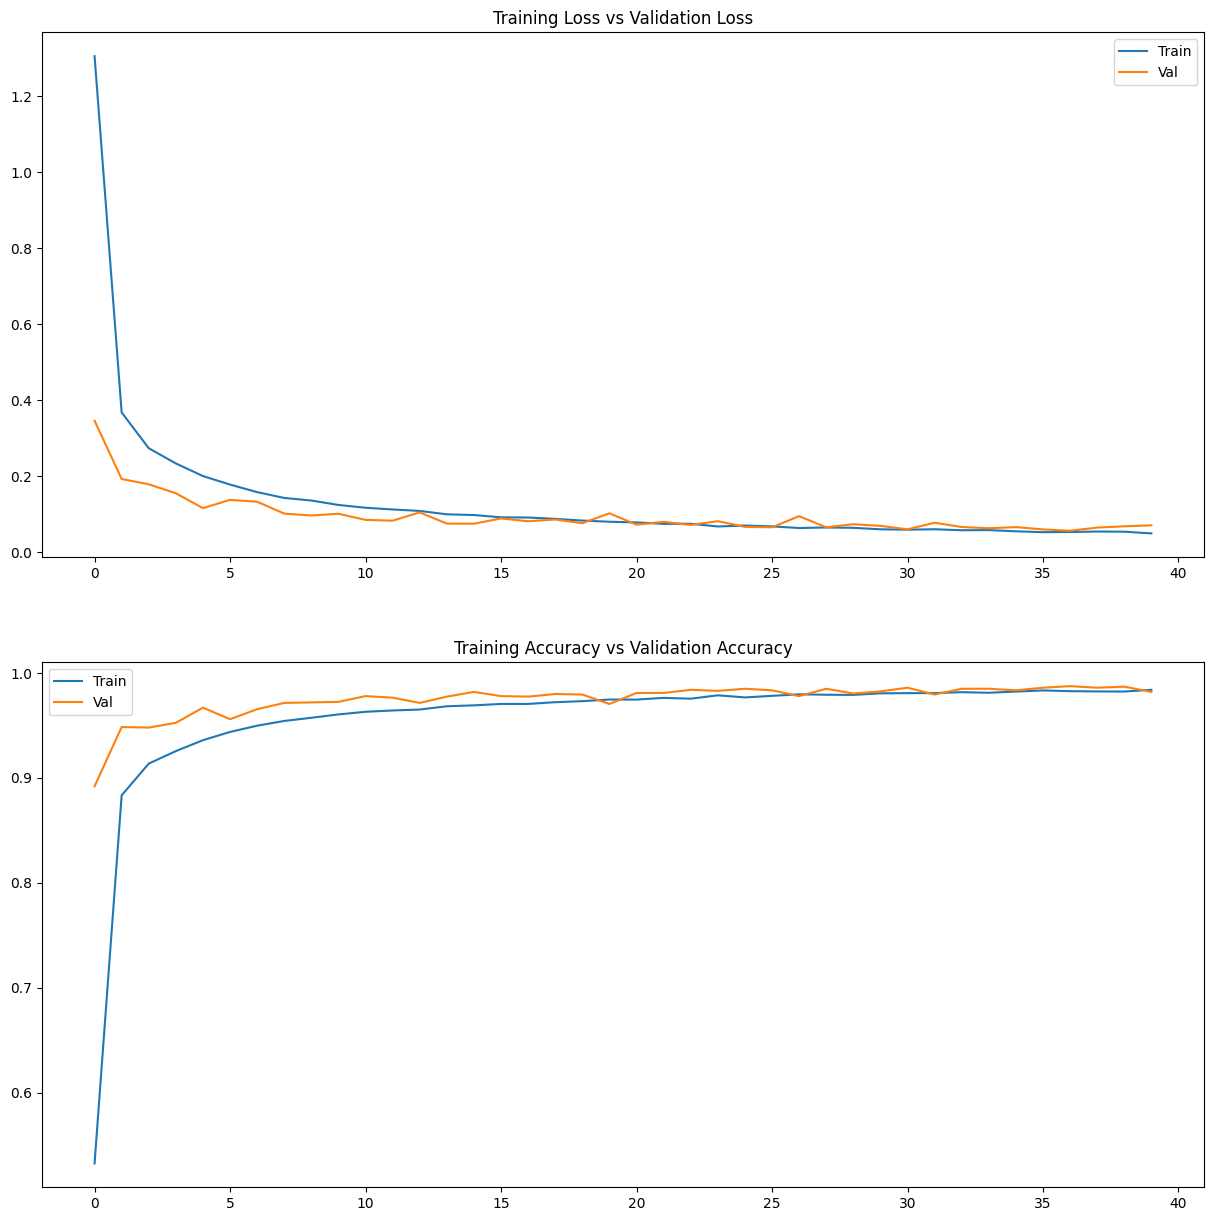

In [10]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])